# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [7]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

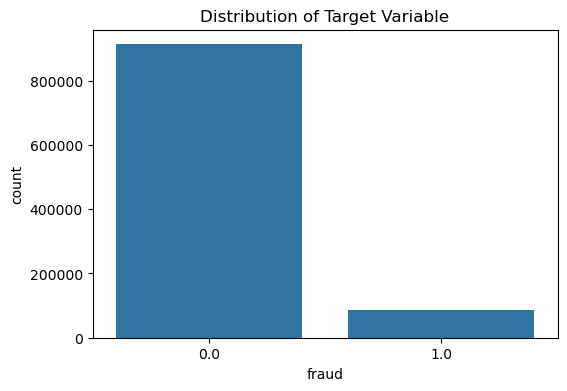

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Load dataset
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")

# 1. Check distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x=fraud['fraud'])
plt.title("Distribution of Target Variable")
plt.show()
print(fraud['fraud'].value_counts(normalize=True))  # Checking class proportions



In [16]:
# Define features and target
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [18]:
# 2. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Evaluate the model
y_pred = model.predict(X_test)
print("Initial Model Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Initial Model Performance:
[[181296   1223]
 [  6895  10586]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.61      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [20]:
# 4. Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)
y_pred_over = model_over.predict(X_test)
print("Oversampling Performance:")
print(confusion_matrix(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over))



Oversampling Performance:
[[170390  12129]
 [   911  16570]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [22]:
# 5. Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)
y_pred_under = model_under.predict(X_test)
print("Undersampling Performance:")
print(confusion_matrix(y_test, y_pred_under))
print(classification_report(y_test, y_pred_under))



Undersampling Performance:
[[170394  12125]
 [   918  16563]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [24]:
# 6. SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)
print("SMOTE Performance:")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


SMOTE Performance:
[[170386  12133]
 [   907  16574]]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

